In [1]:
# The typical imports
import gym
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display, clear_output

In [87]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))
    return anim

In [119]:
def save_animation_to_gif(anim, file_name):
    anim.save("./temp.html")
    os.system("convert -delay 20 -loop 0 ./temp_frames/*.png ./my_gifs/{}.gif".format(file_name))
    os.system('rm -rf ./temp_frames')
    os.system('rm ./temp.html')

save_animation_to_gif(anim, "big_dog")

In [3]:
env = gym.make('CartPole-v0')

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.


In [5]:
env = gym.make('CartPole-v0')
env.reset()
num_episodes=1000


live_render = False
frame_history = False
frames = []
def update_display(cur_frame):
    img.set_data(cur_frame)
    display(plt.gcf())
    clear_output(wait=True)
    
if live_render:
    img = plt.imshow(env.render(mode='rgb_array')) # only call this once
    
    
def run_episode(env, parameters):
    observation = env.reset()
    total_reward = 0
    for t in range(500):
        if live_render or frame_history:
            cur_frame = env.render(mode = 'rgb_array')
        if frame_history:
            frames.append(cur_frame)
        if live_render:
            update_display(cur_frame)
            
        action = int(np.matmul(parameters,observation) < 0)
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward
    
best_reward = 0
best_params = None
for i_episode in range(num_episodes):
    parameters = np.random.rand(4) * 2 - 1
    reward = run_episode(env, parameters)
    if reward > best_reward:
        best_reward = reward
        best_params = parameters
    print "\rEpisode {}/{} finished with reward {}".format(i_episode+1, num_episodes, reward),
    if best_reward == 200:
        break

print ""
print "best_reward: {} achieved with params {}".format(best_reward, best_params)

WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
Episode 16/1000 finished with reward 200.0 
best_reward: 200.0 achieved with params [-0.48721339 -0.04372256 -0.76023119 -0.32160233]



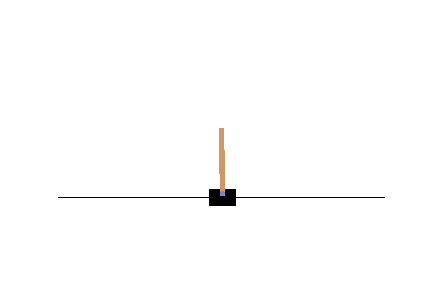
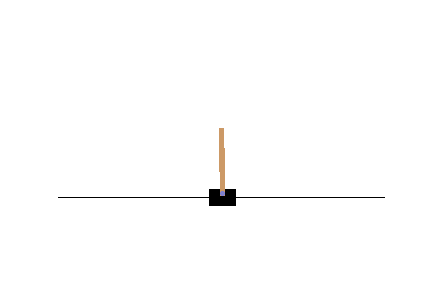
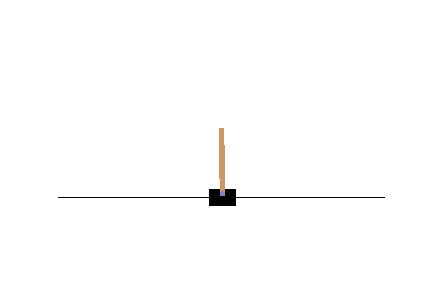
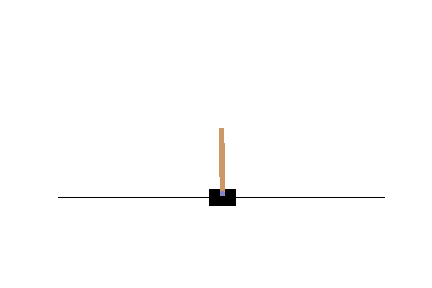
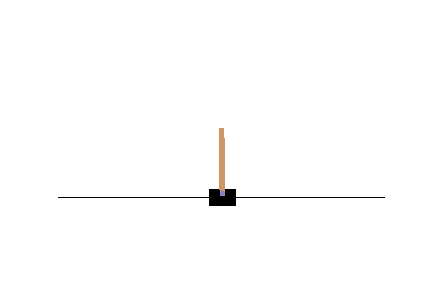
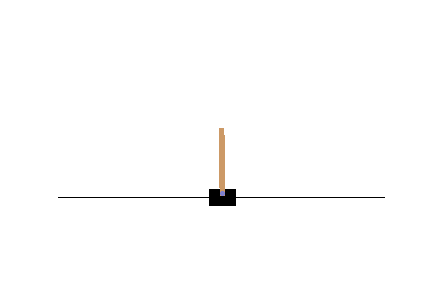
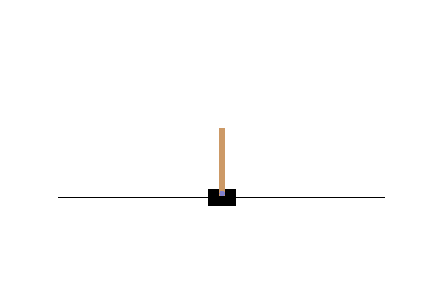
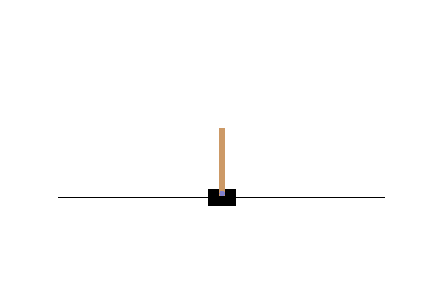
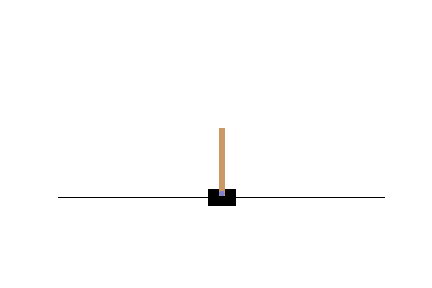
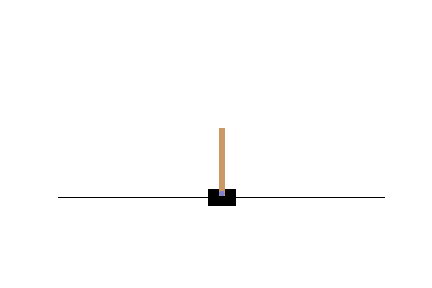
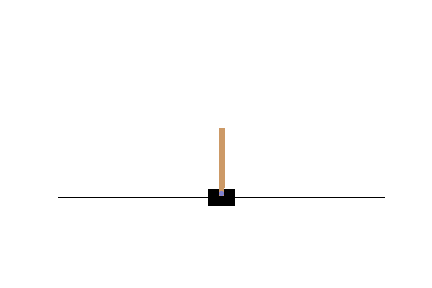
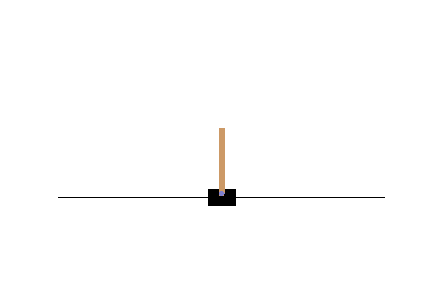
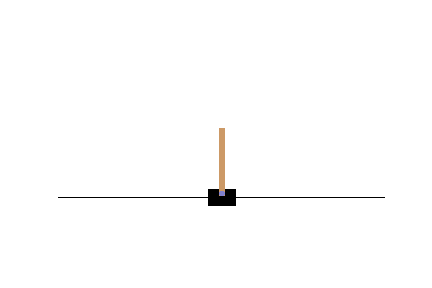
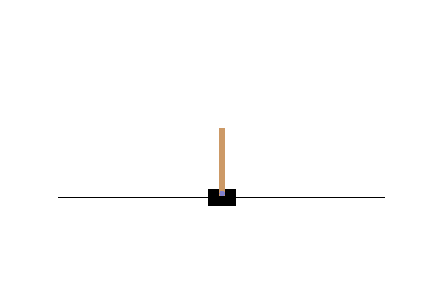
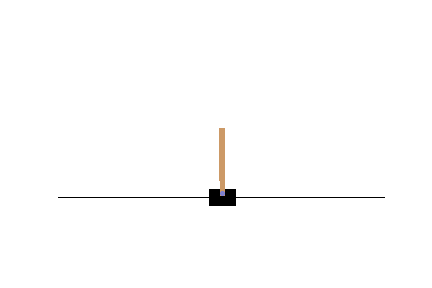
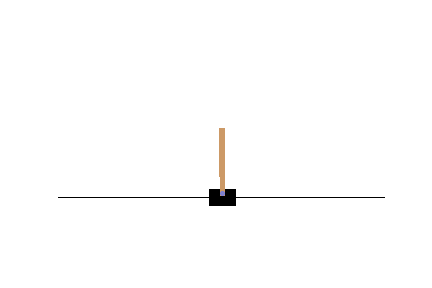
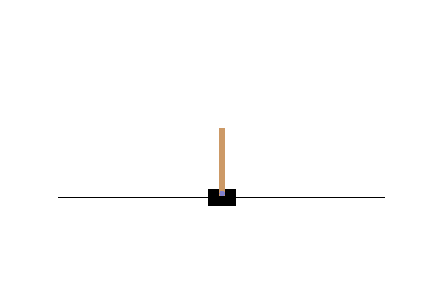
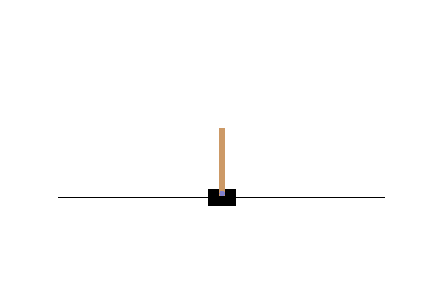
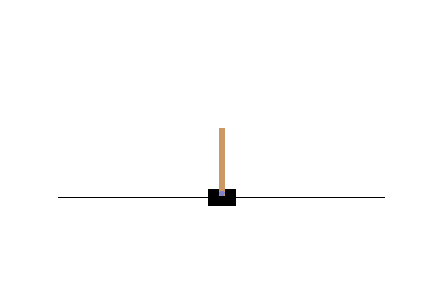
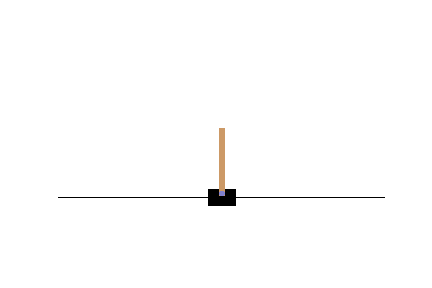
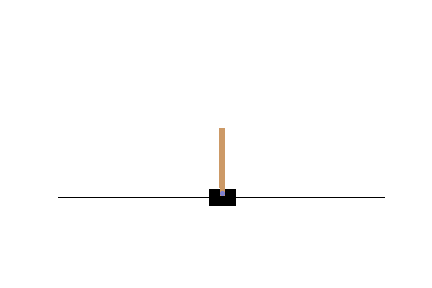
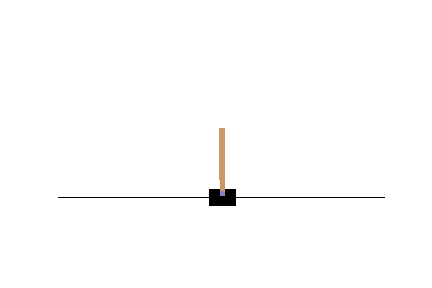
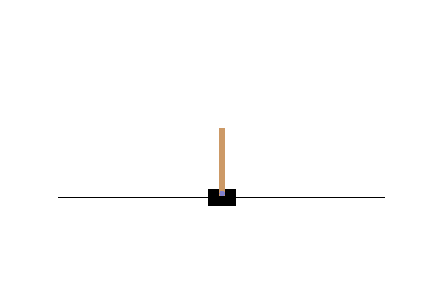
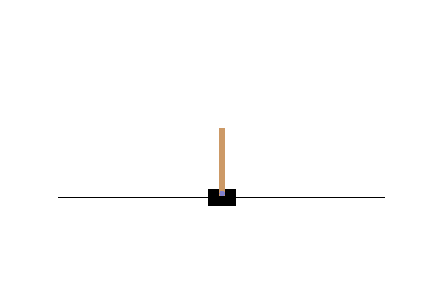
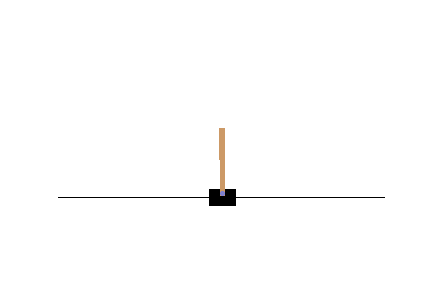
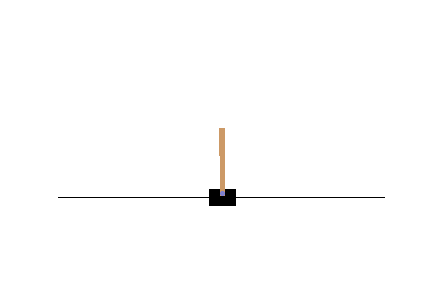
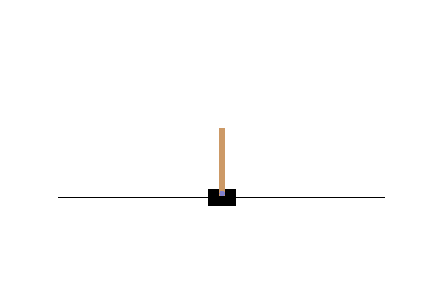
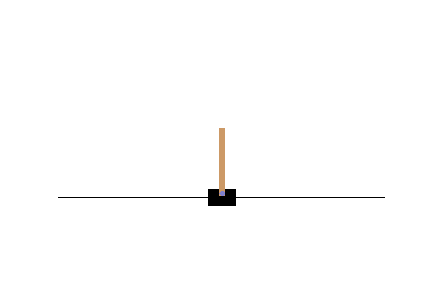
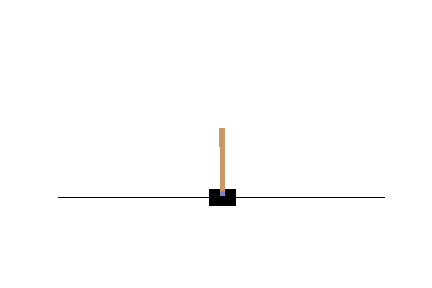
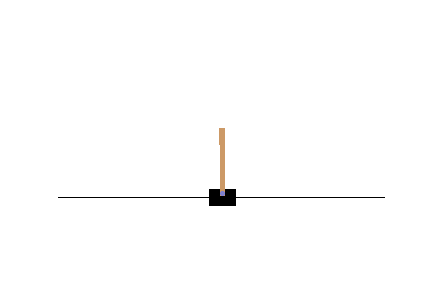
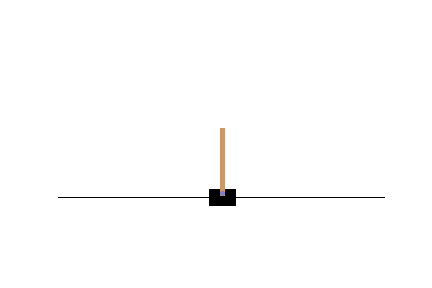
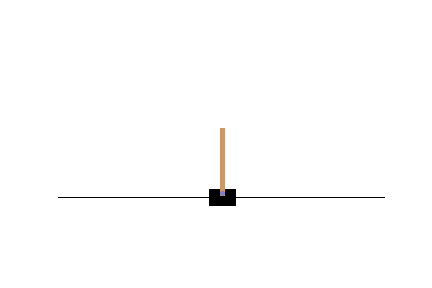
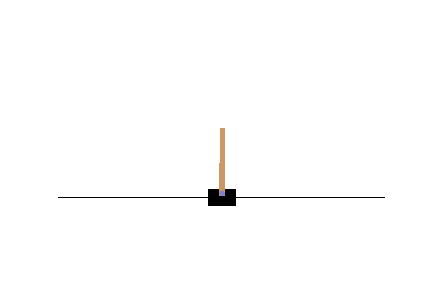
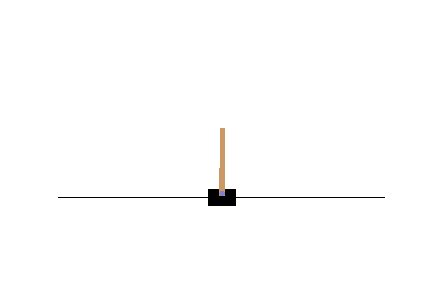
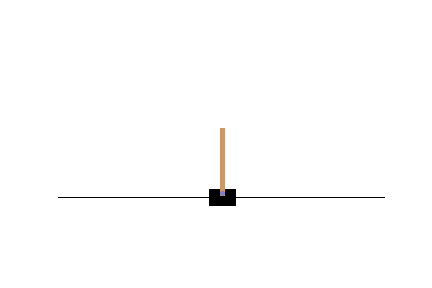
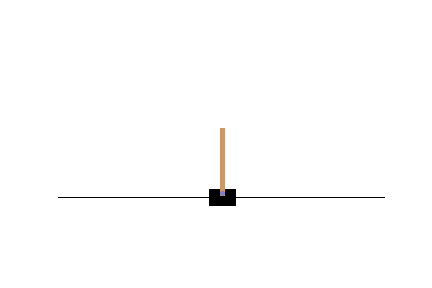
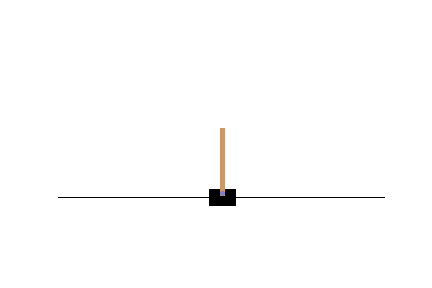
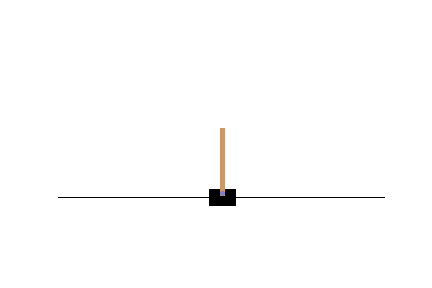
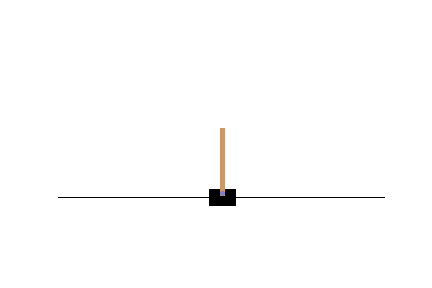
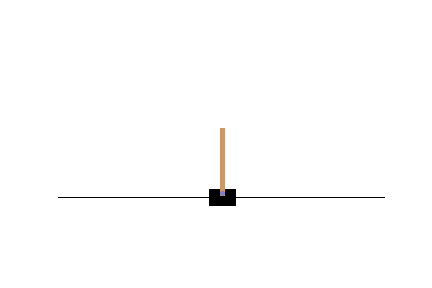
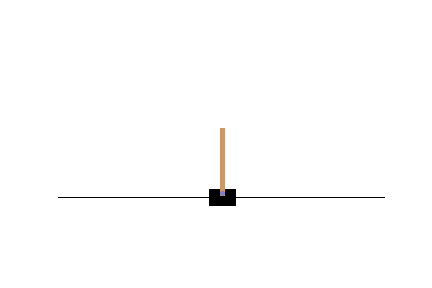
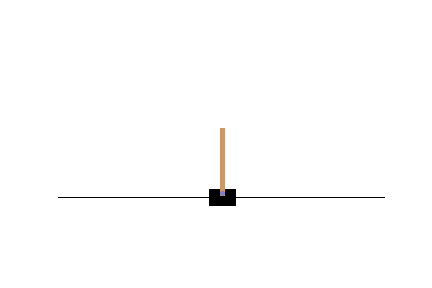
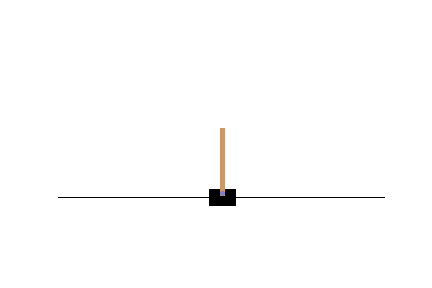
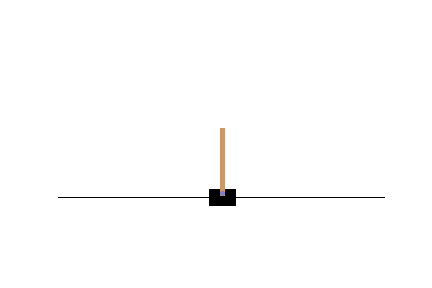
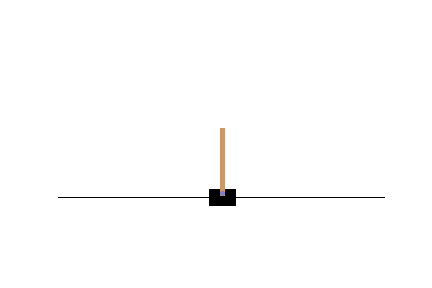
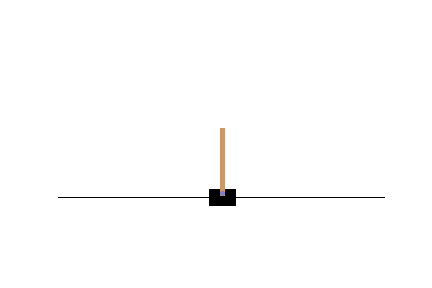
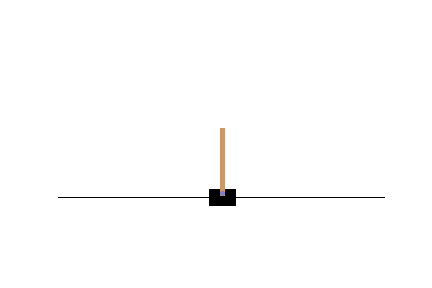
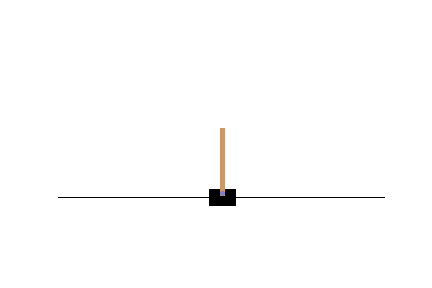
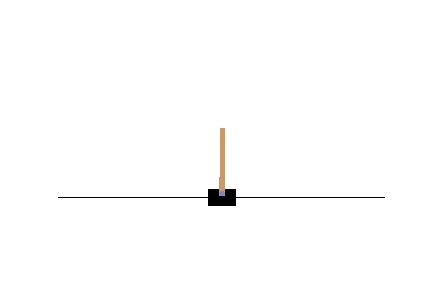
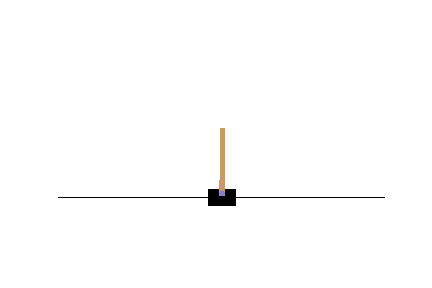
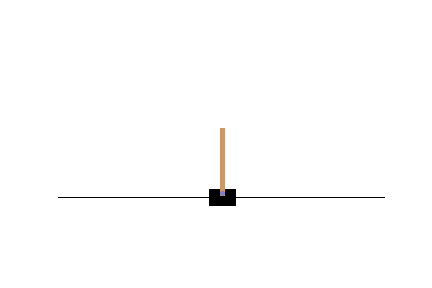
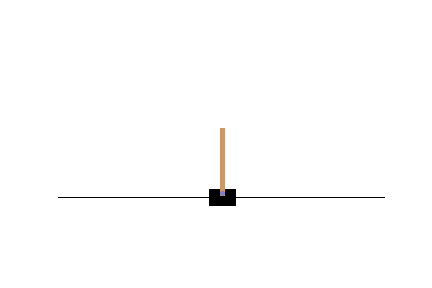
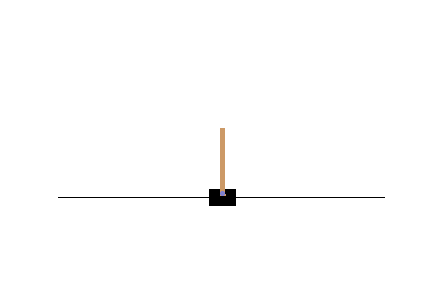
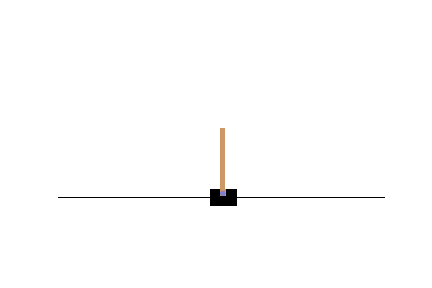
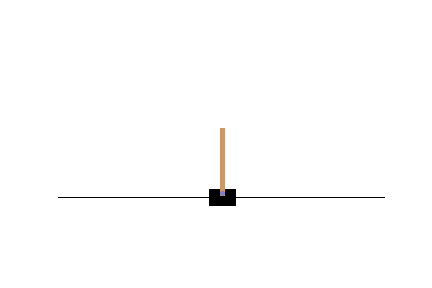
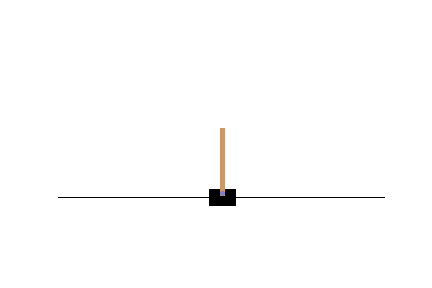
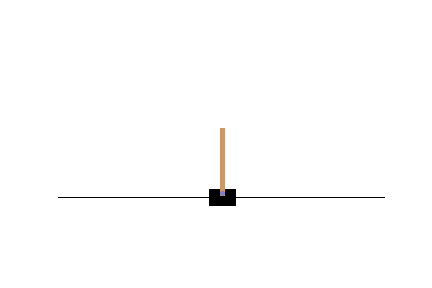
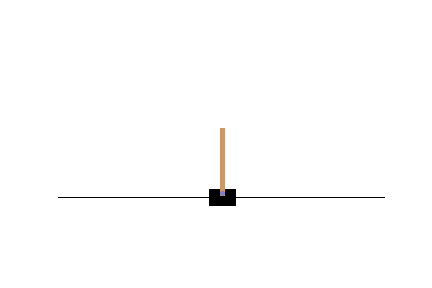
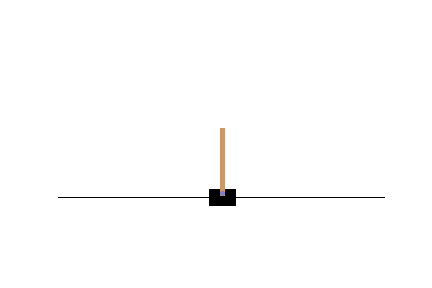
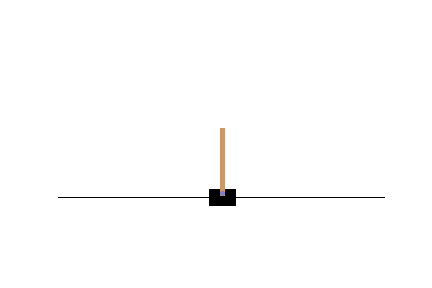
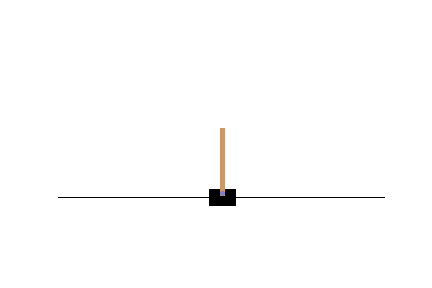
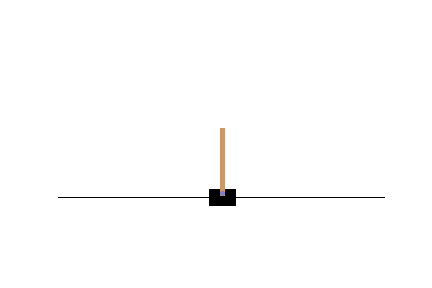
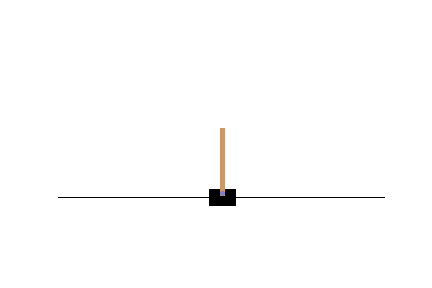
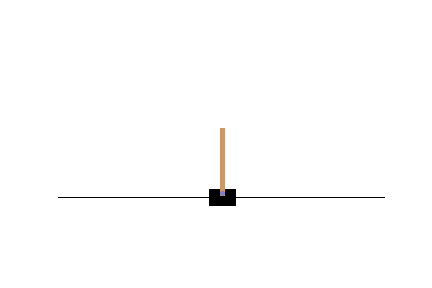
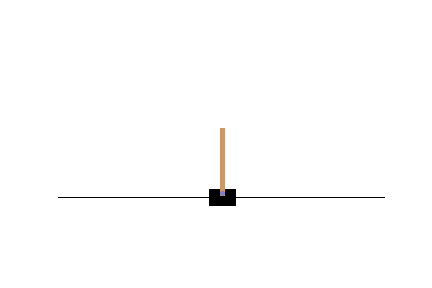
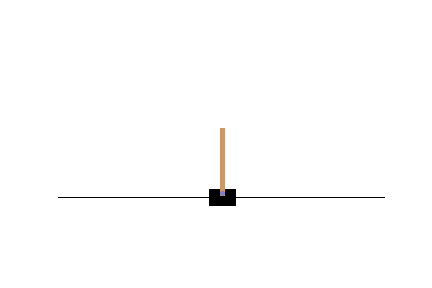
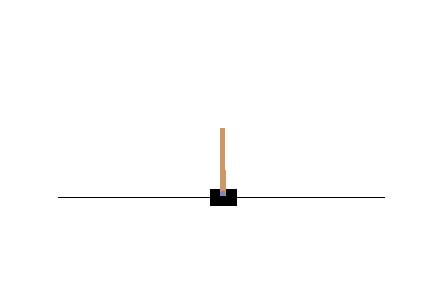
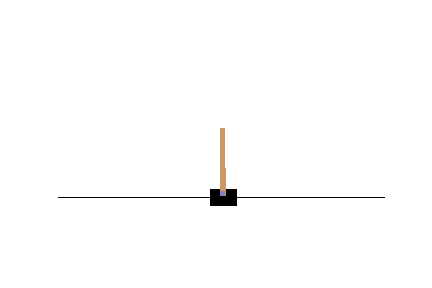
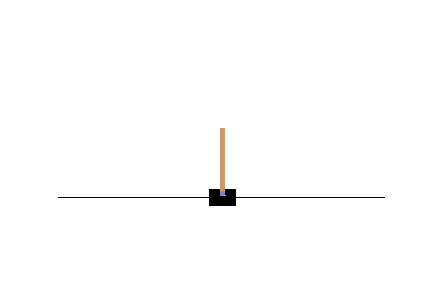
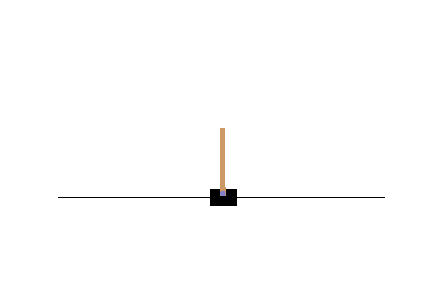
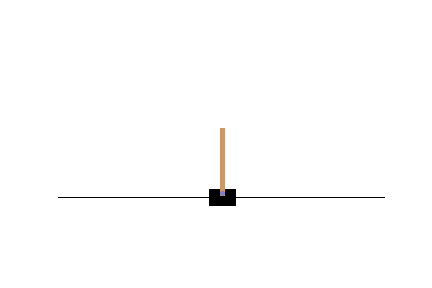
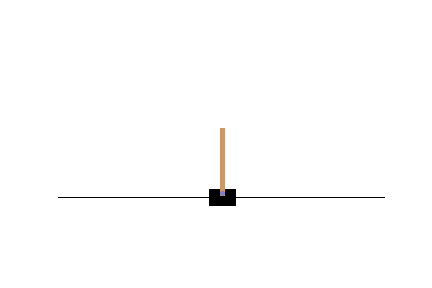
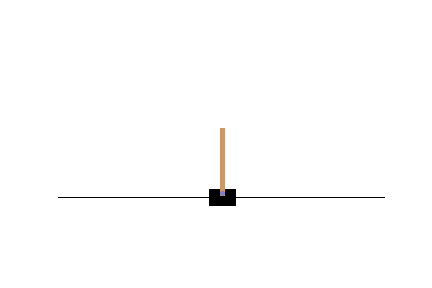
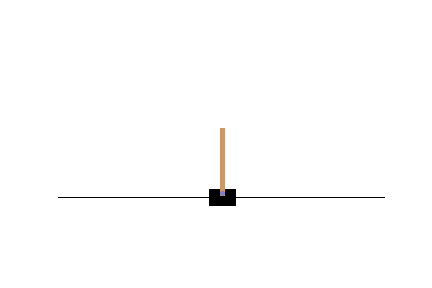
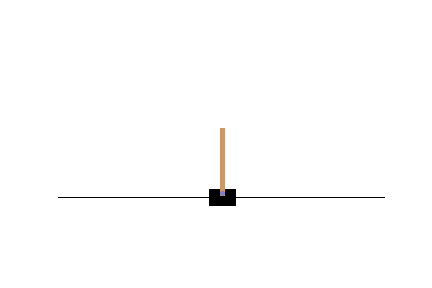
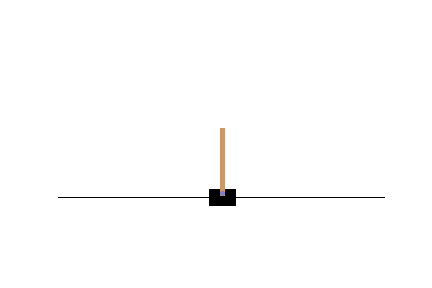
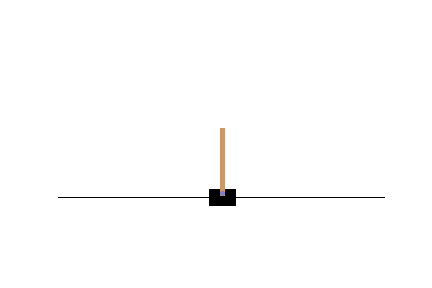
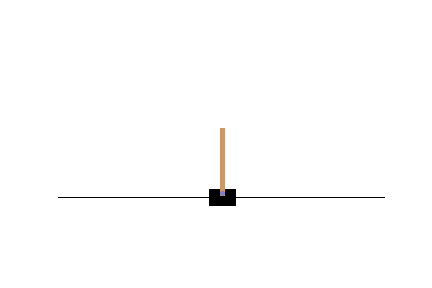
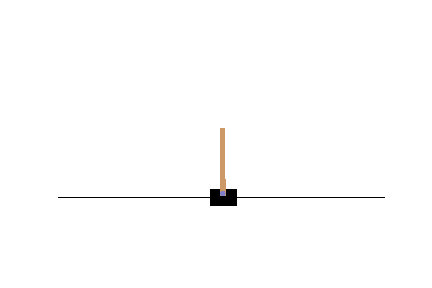
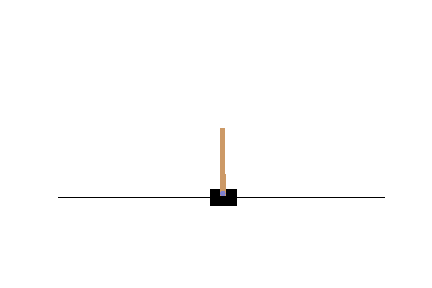
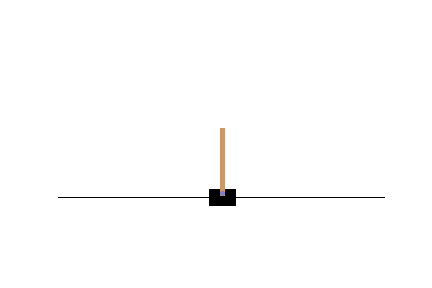
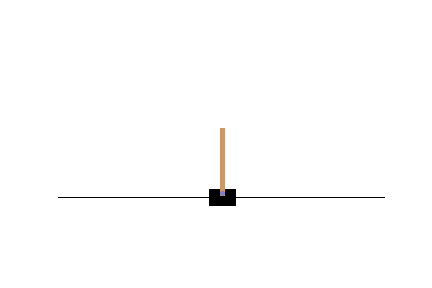
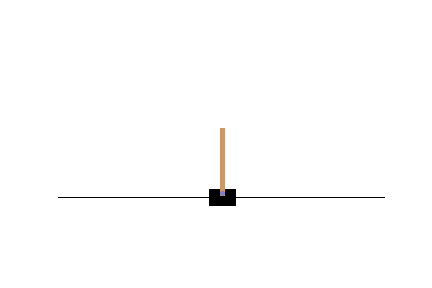
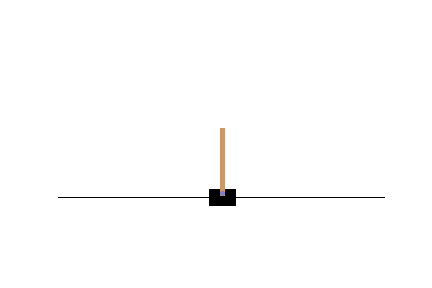
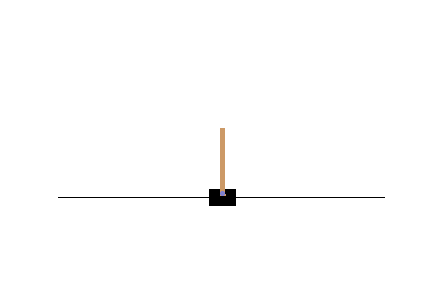
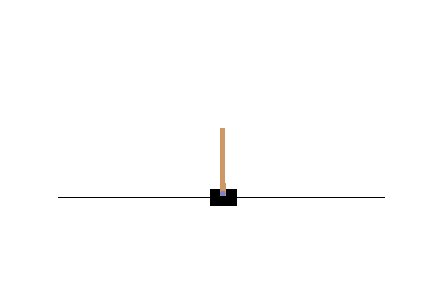
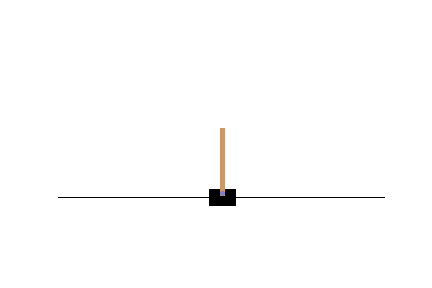
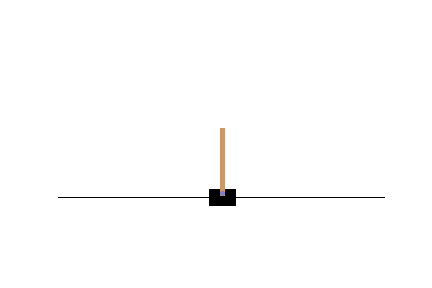
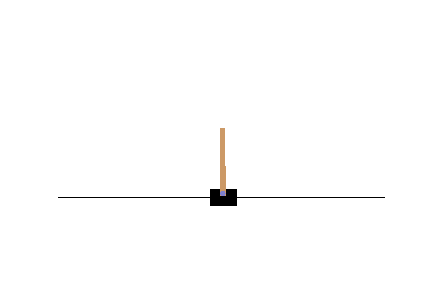
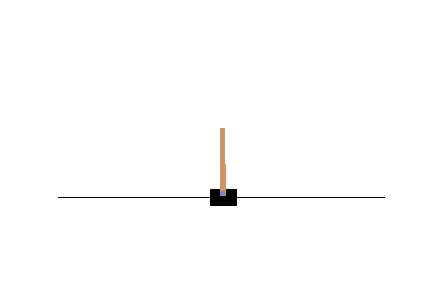
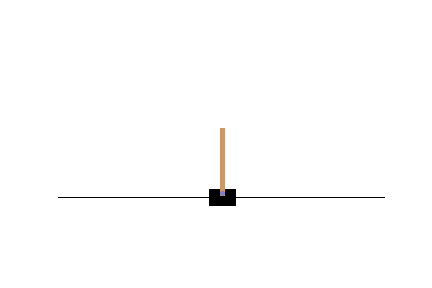
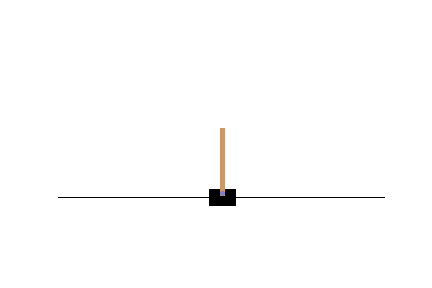
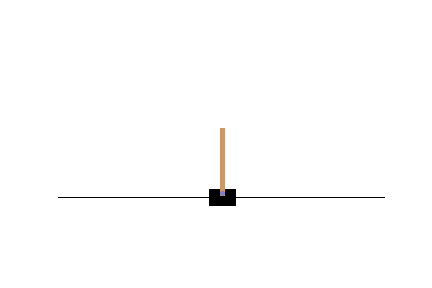
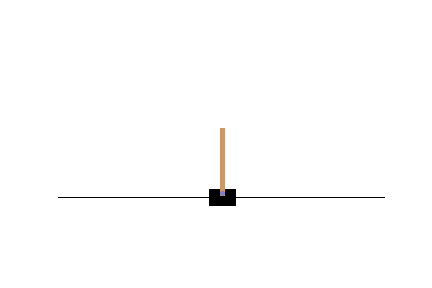
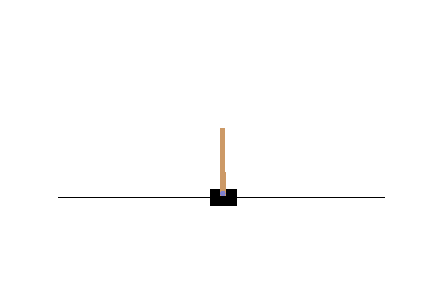
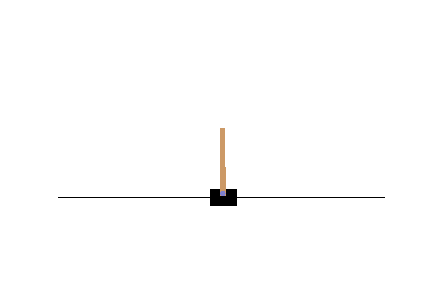
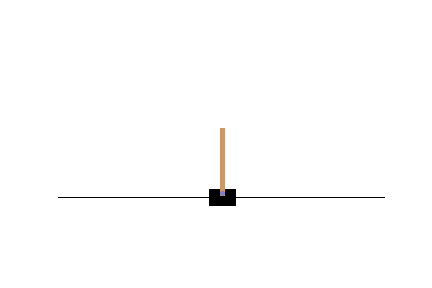
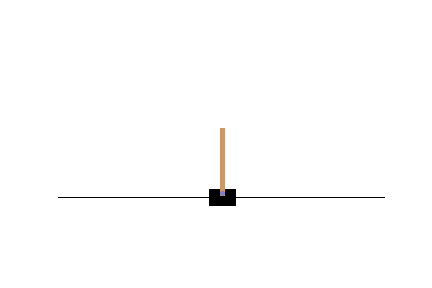
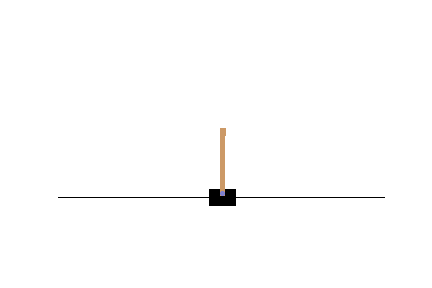
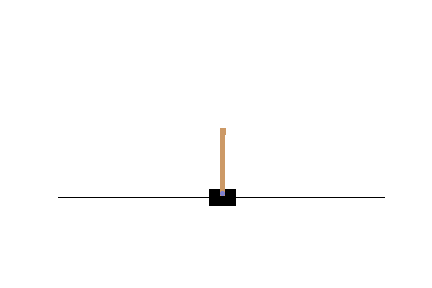
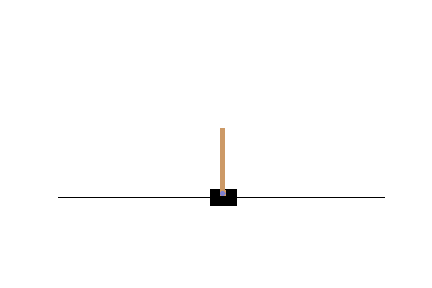
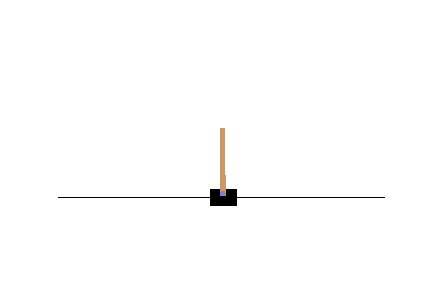
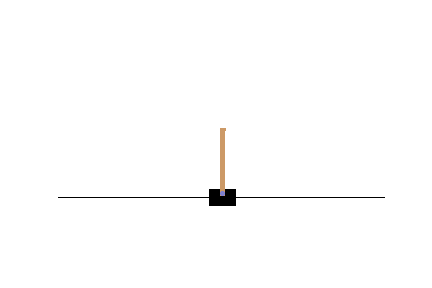
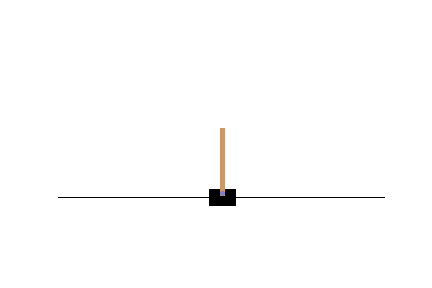
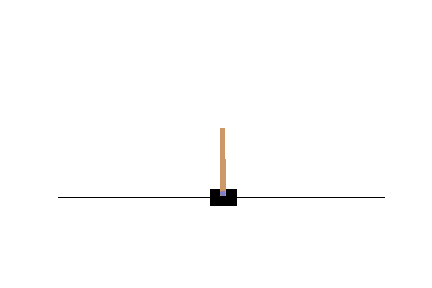
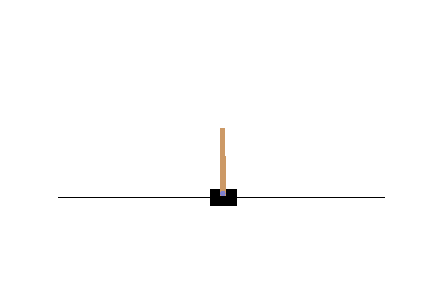
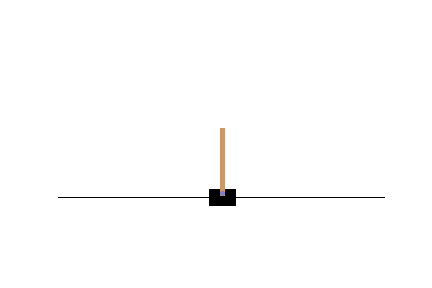
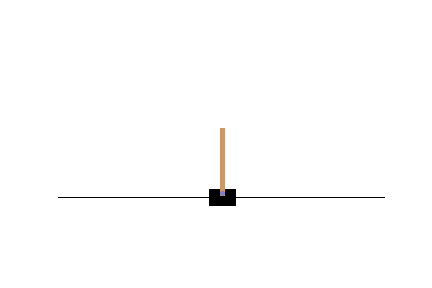
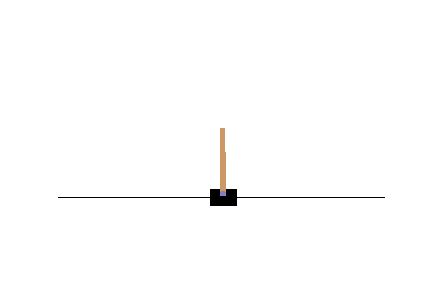
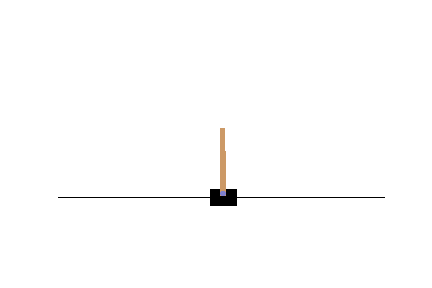
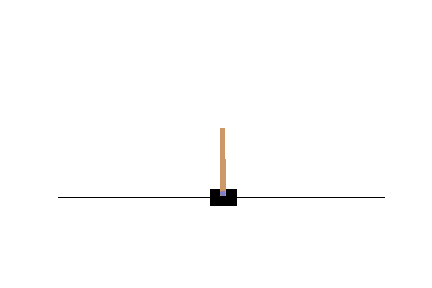
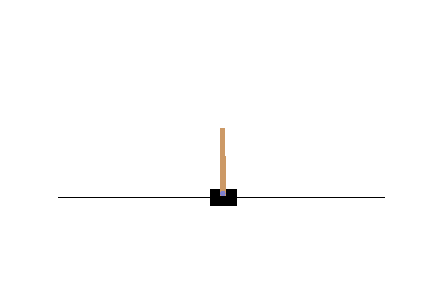
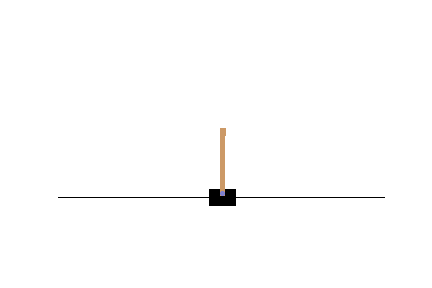
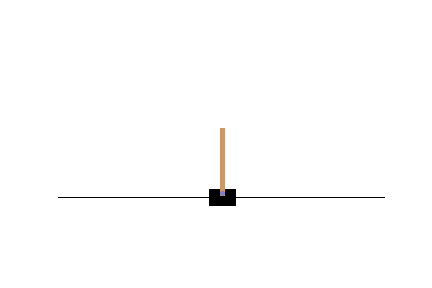
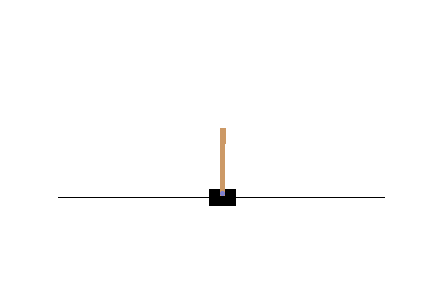
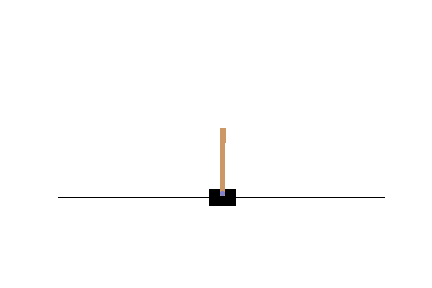
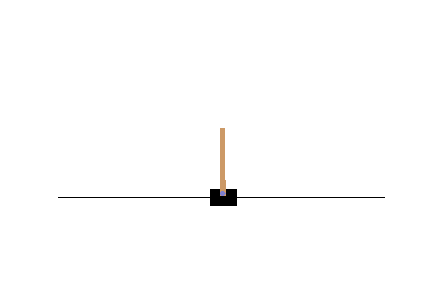
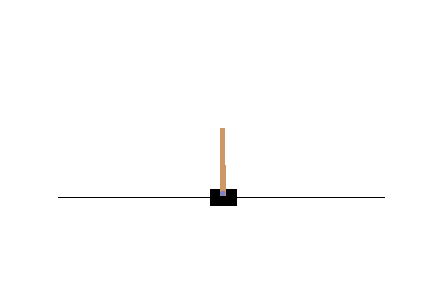
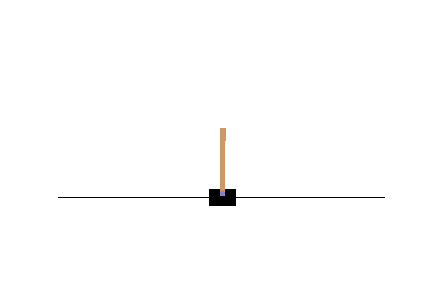
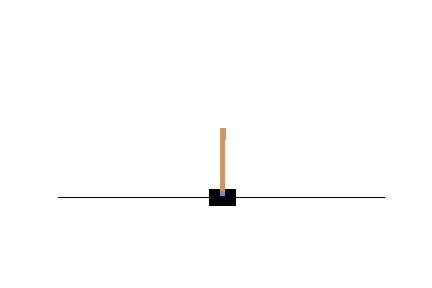
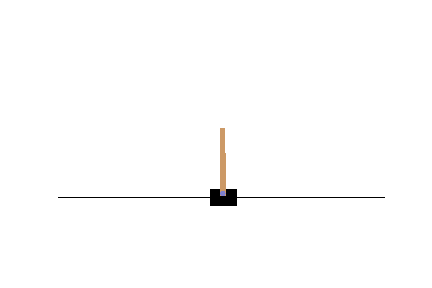
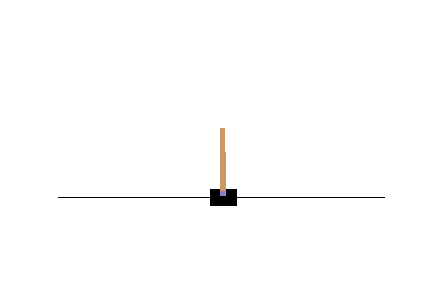
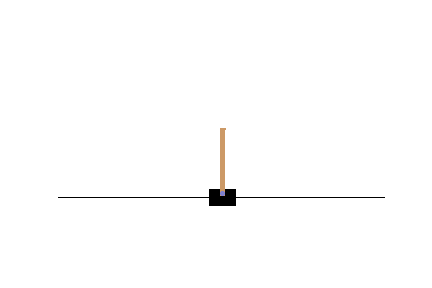
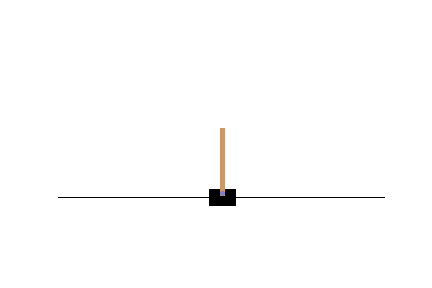
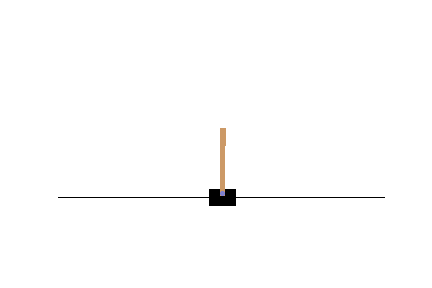
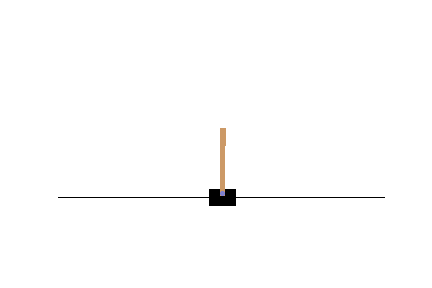
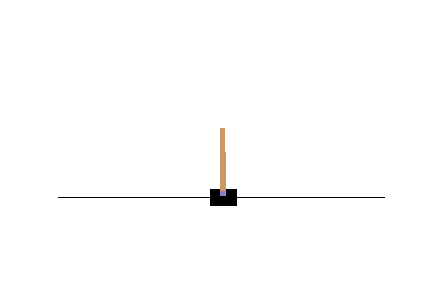
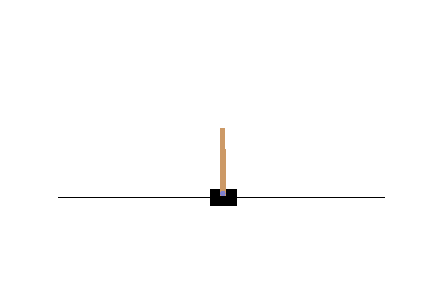
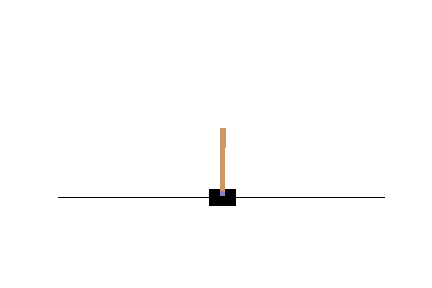
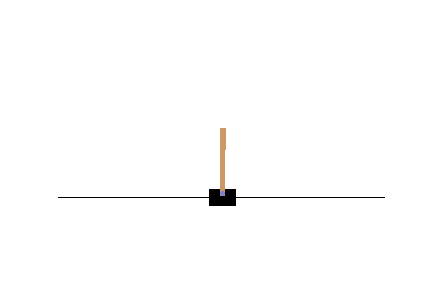
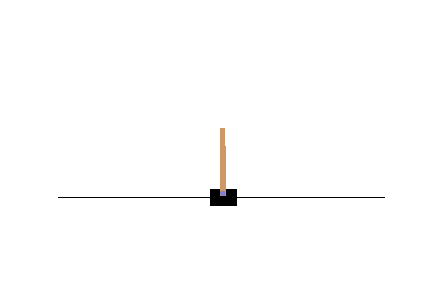
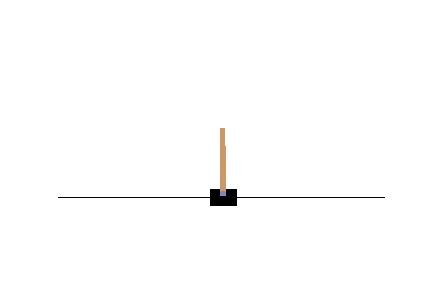
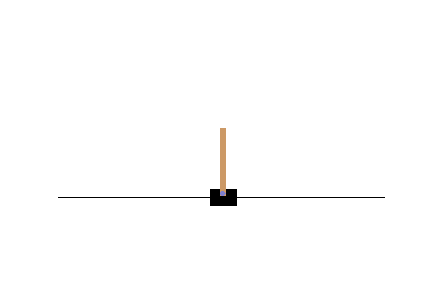
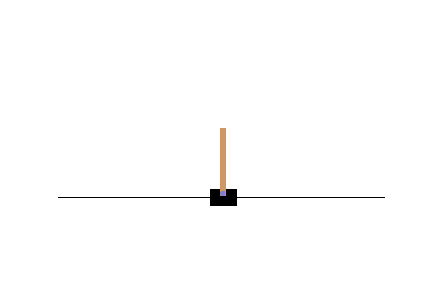
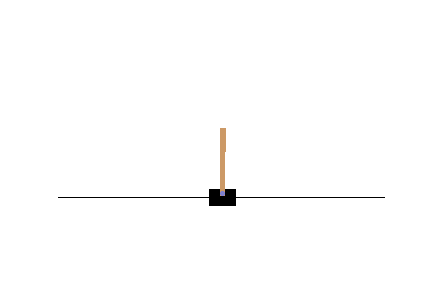
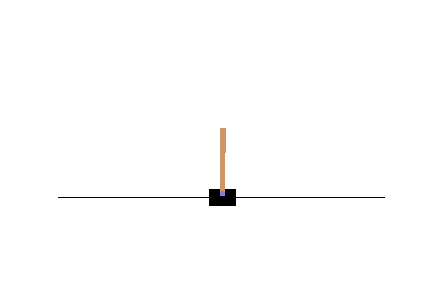
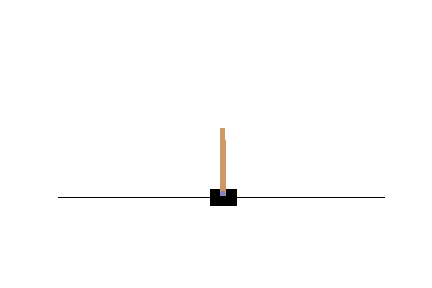
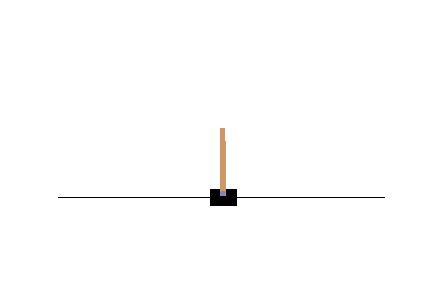
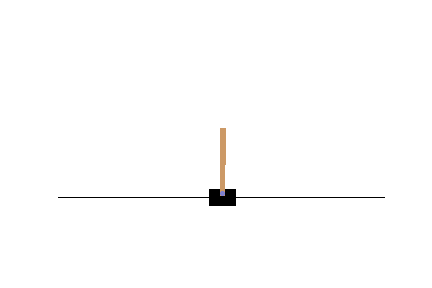
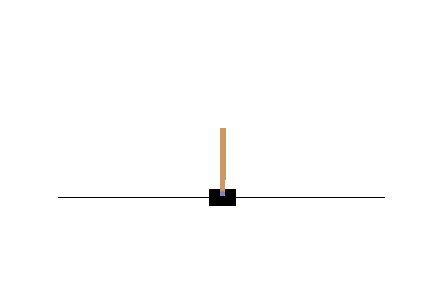
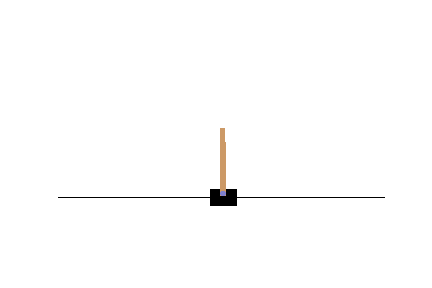
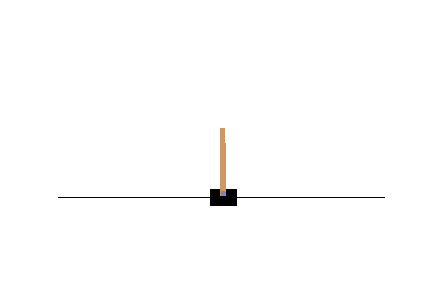
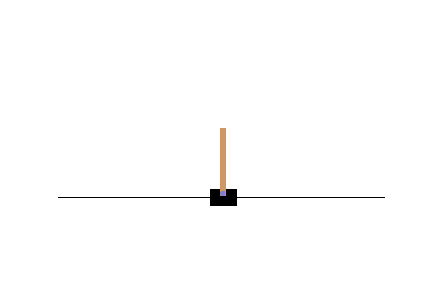
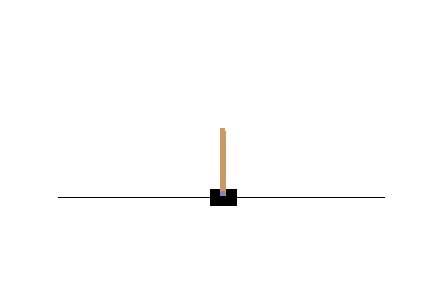
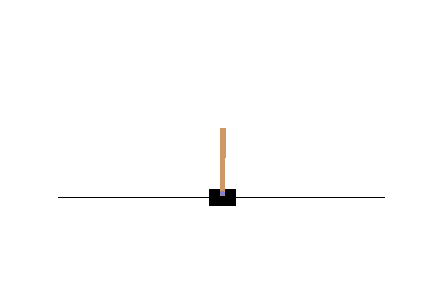
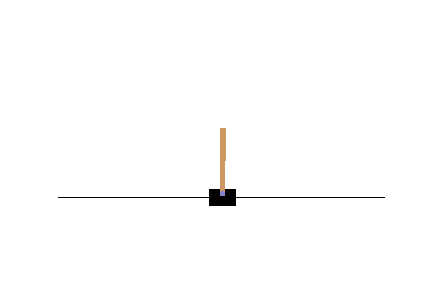
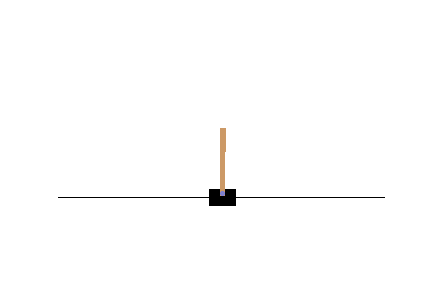
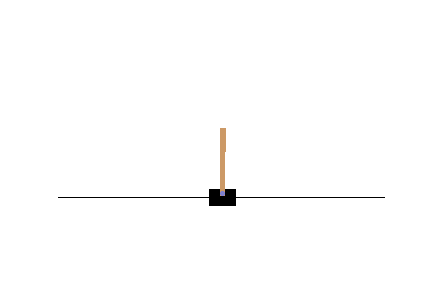
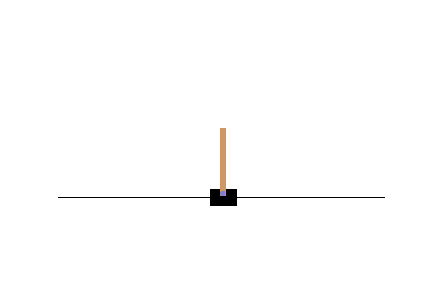
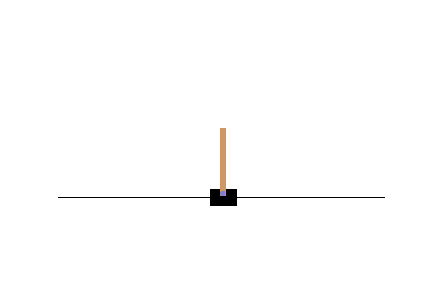
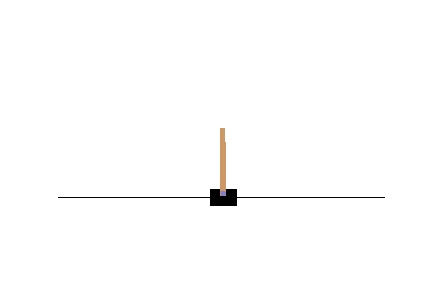
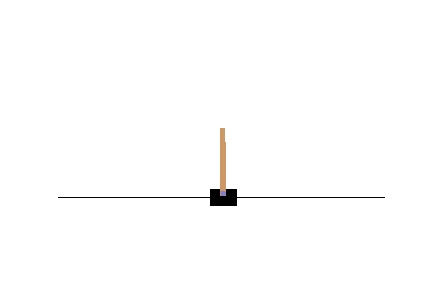
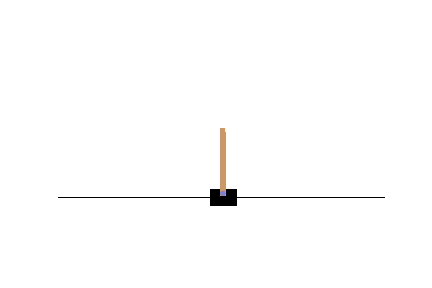
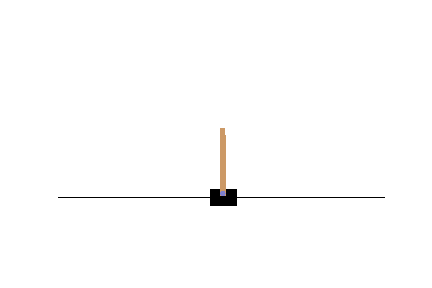
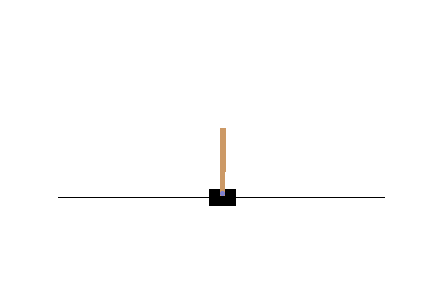
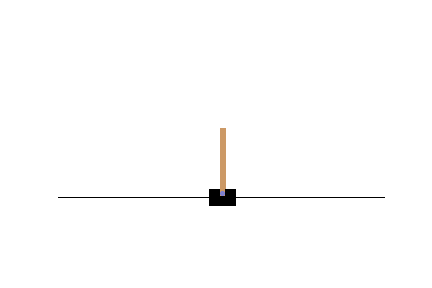
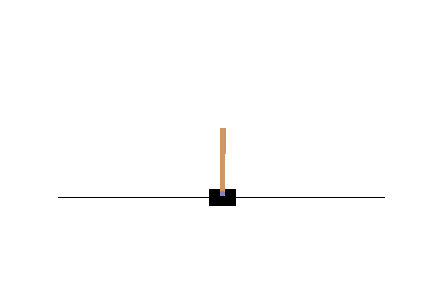
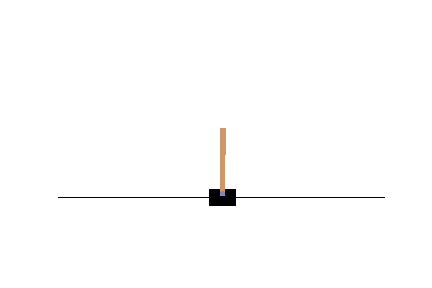
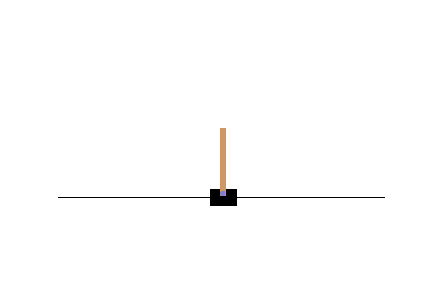
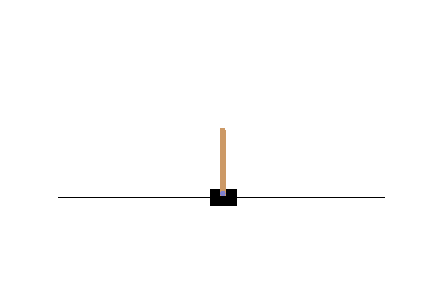
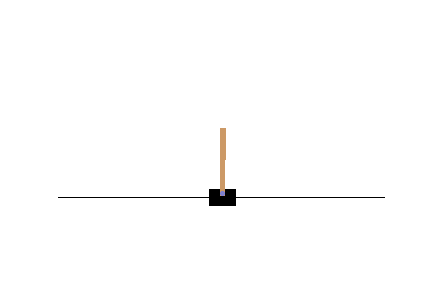
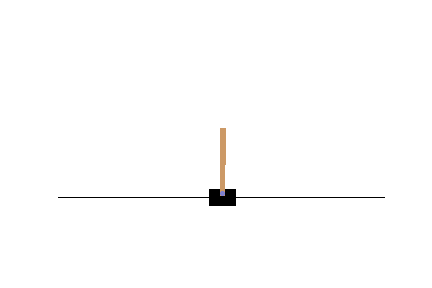
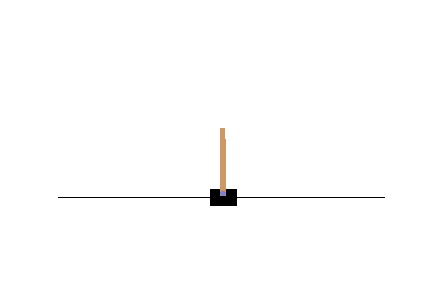
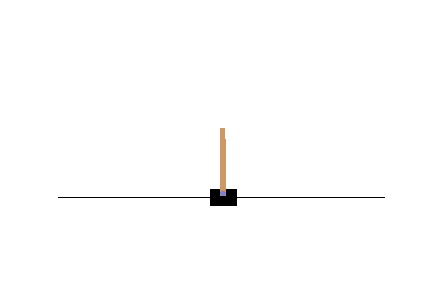
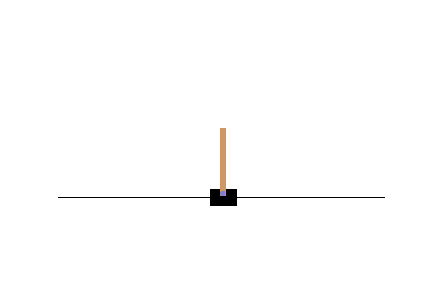
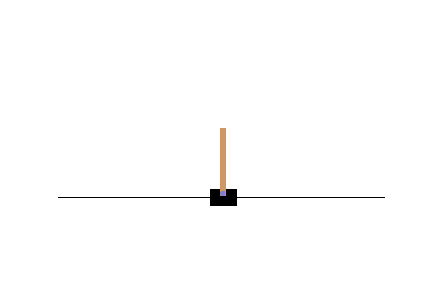
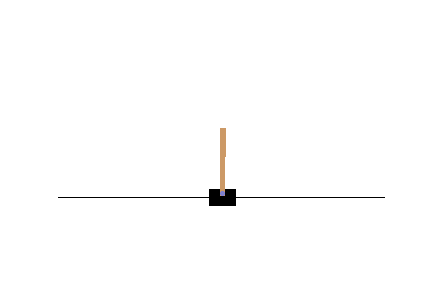
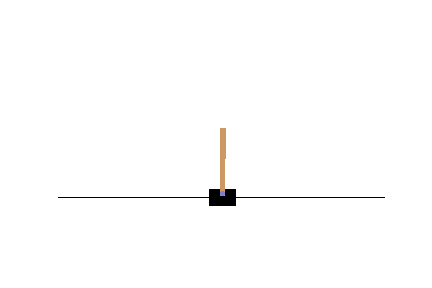
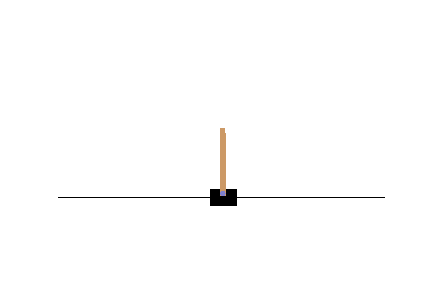
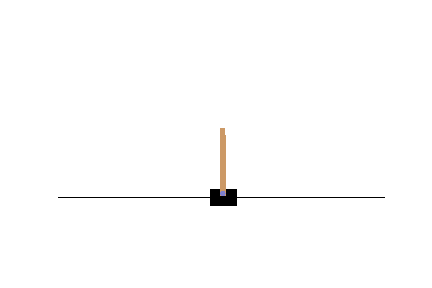
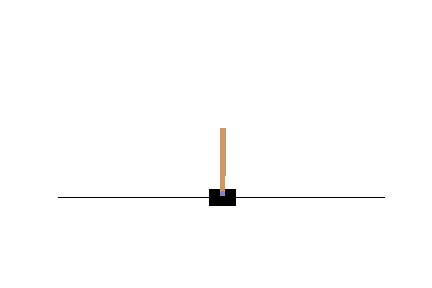
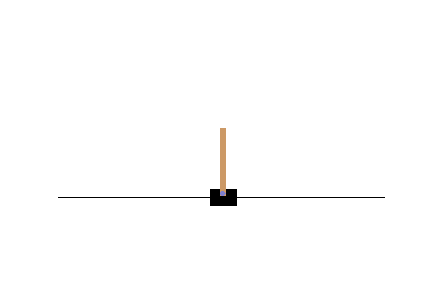
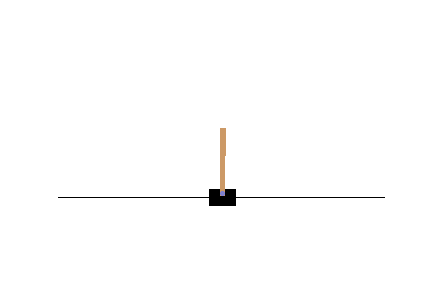
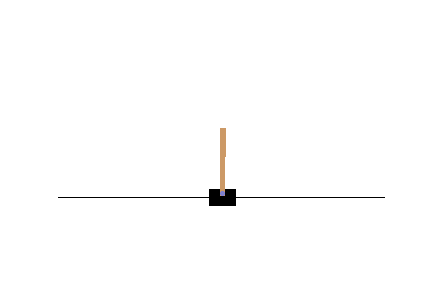
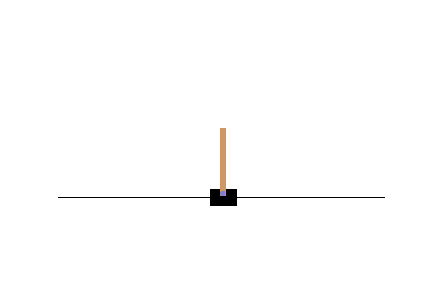
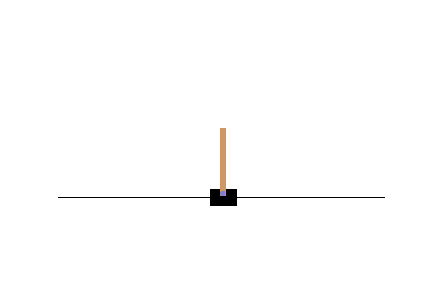
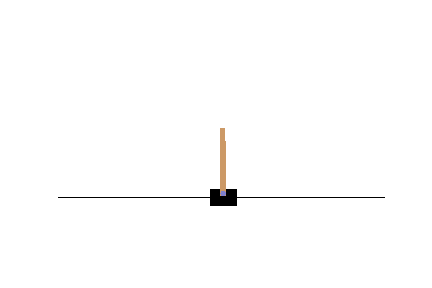
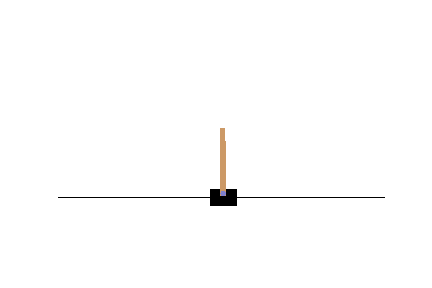
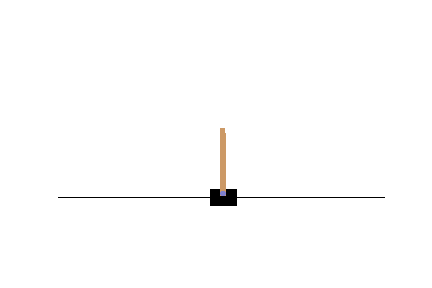
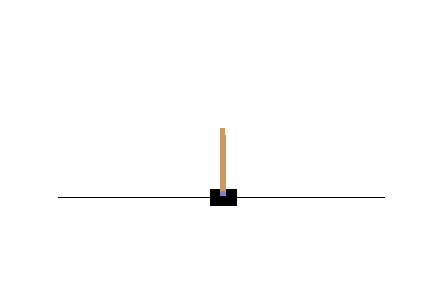
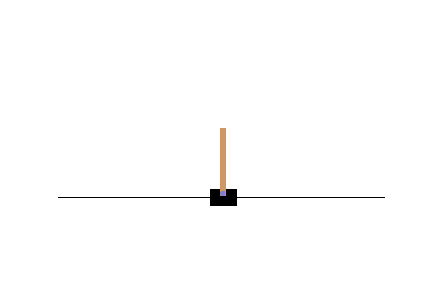
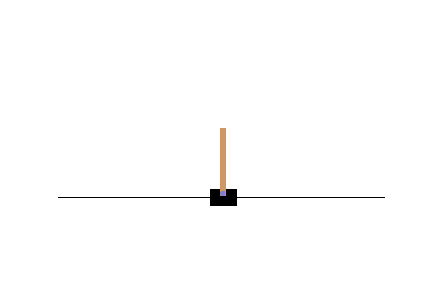
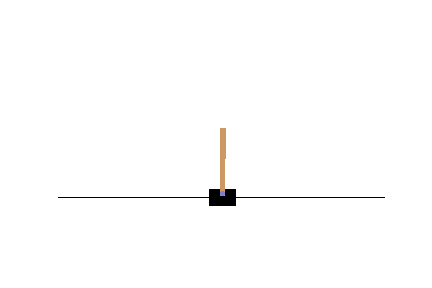
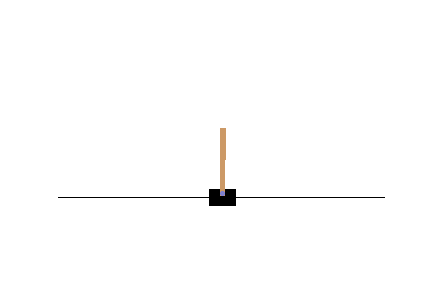
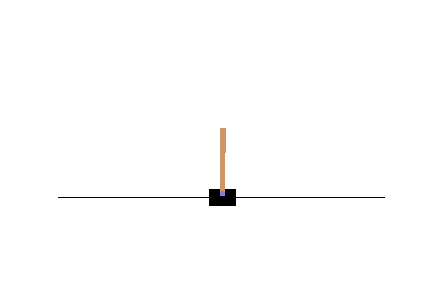
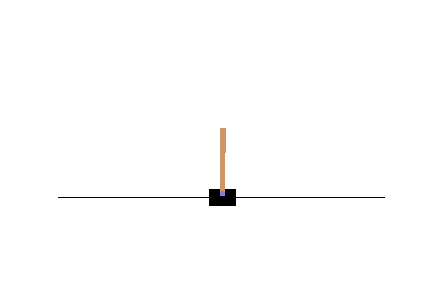
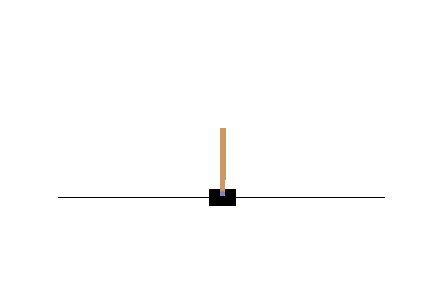
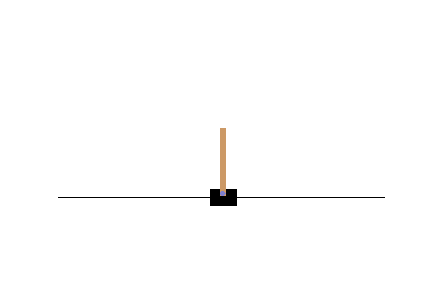
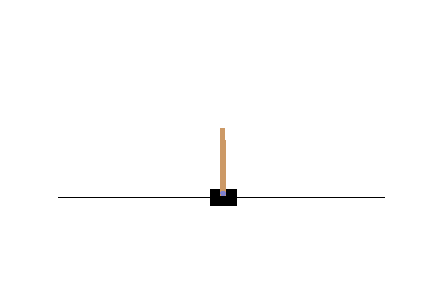
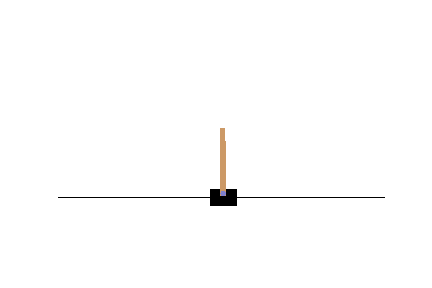
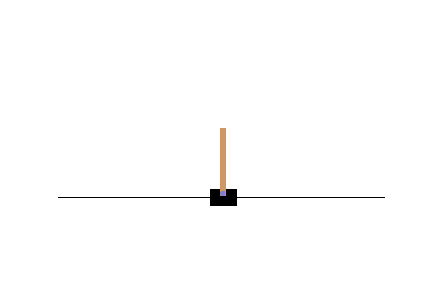
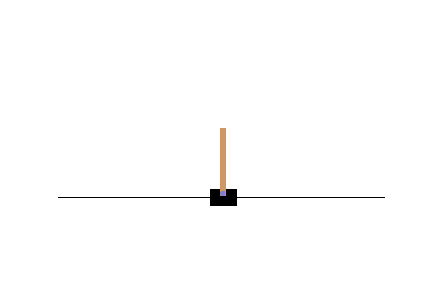
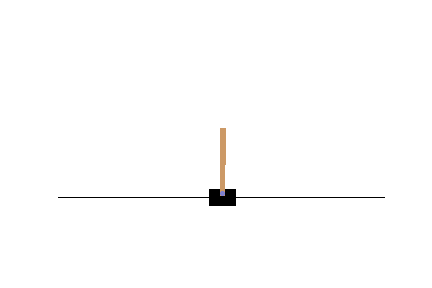
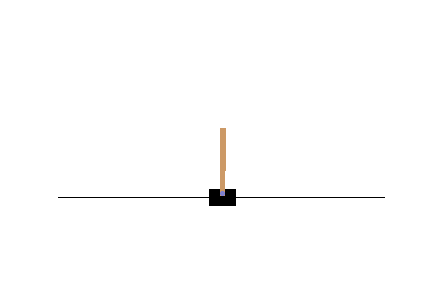
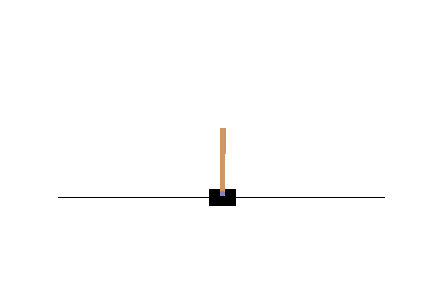
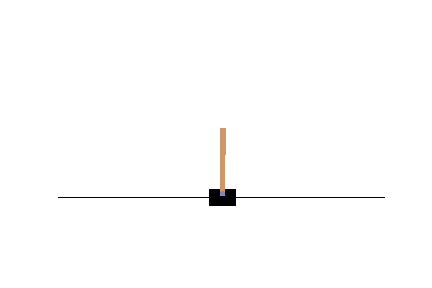
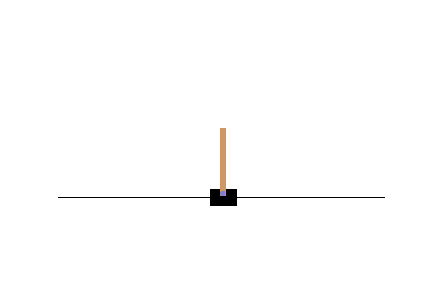
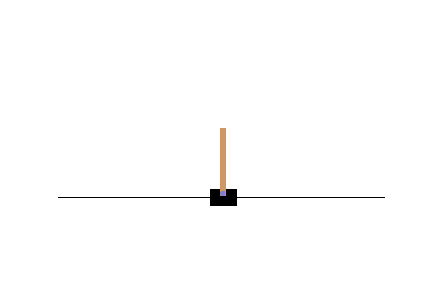
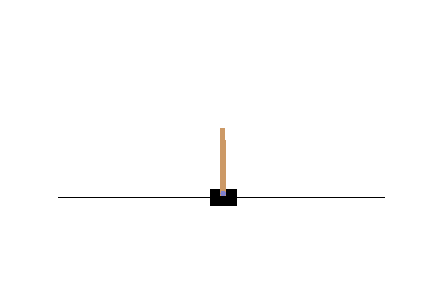
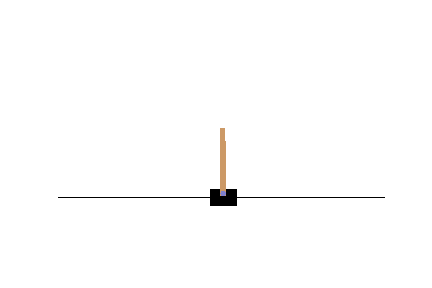

In [88]:
anim = display_frames_as_gif(frames)

In [6]:
best_params

array([-0.48721339, -0.04372256, -0.76023119, -0.32160233])

200.0

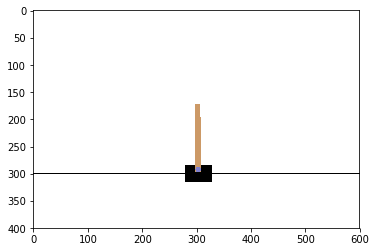

In [82]:
live_render = True
frame_history = True
frames = []

if live_render:
    img = plt.imshow(env.render(mode='rgb_array')) # only call this once
    def update_display(cur_frame):
        img.set_data(cur_frame)
        display(plt.gcf())
        clear_output(wait=True)

run_episode(env, best_params)

In [111]:
import os